# Chapter 3 - Classification
In the previous notebook we performed a regression task.</br> In this notebook we will use MNIST dataset to perform classification.


## Setup
Going through the initial setup as usual (most common imports, matplotlib setting, save_fig function).

In [1]:
import pandas as pd
import sklearn
import numpy as np
import os

# To make this notebook's output stable across all runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# To set overall parameters for all the matplot figures
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """ Save the given figure with these general parameters
  in the correct directory"""

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure " + fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST
MNIST is a data set of handwritten digits (0-9) and their corresponding labels.</br>Scikit-Learn has helper functions to download popular datasets, including MNIST. Newer versions return DataFrames but since we don't use that in this noteboook so we set *as_frame* to False.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

Many different columns.

In [ ]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
X, y = mnist["data"], mnist["target"]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (70000, 784)
y shape:  (70000,)


70000 instances and 784 pixel per instance

*plot_digit()* function takes a row of 784 numbers and reshapes it into a 28x28 image which then it will display as a picture using *imshow()*:

In [ ]:
def plot_digit(data):
  """Plots a single data instance (digit)"""
  image = data.reshape(28, 28)
  plt.imshow(image, cmap=mpl.cm.binary,
             interpolation="nearest")
  plt.axis("off")

Saving figure some_digit_plot
label is 2 of type <class 'str'>


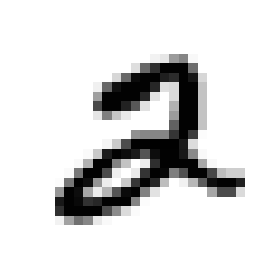

In [ ]:
# Let's try it out:
plot_digit(X[5])
save_fig("some_digit_plot")
print("label is " + y[5] + " of type " + str(type(y[5])))

The labels are strings. We prefer working with integers. So let's convert them:

In [ ]:
y = y.astype(np.uint8)
type(y[5])

numpy.uint8

*plot_digits()* takes a number of row values, reshapes them and displays them one after another in rows (just take a look at the plot):

In [ ]:
def plot_digits(instances, images_per_row, **options):
  """Plot a number of digits to get a sense of data we deal with"""
  size = 28
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size,size) for instance in instances]
  n_rows = (len(images) - 1) // images_per_row + 1
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  row_images = []
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
  image = np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap=mpl.cm.binary, **options)
  plt.axis("off")


Saving figure more_digits_plot


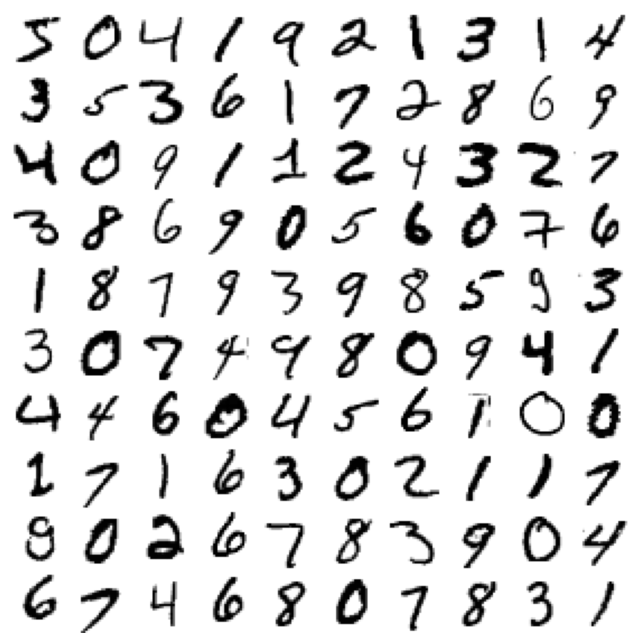

In [ ]:
# Let's view our last 100 digits from the dataset, 10 images per row:
plt.figure(figsize=(9, 9))
plot_digits(X[:100], 10)
save_fig("more_digits_plot")
plt.show()

Don't forget to make a test set and put it aside, before inspecting the data more closely.</br>Good news: MNIST is actually split into training (first 60000) and test set (next/last 10000). That makes things much easier:

In [ ]:
X_train, X_tests, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary classifier
Let's start simple. We will just train a binary classifier called "5-detector", which (you guessed it) detects 5s, telling us whether a number is 5 or not! </br>We can set the label to 1 for all 5s and set it to 0 for all other digits:

In [ ]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other labels
y_test_5 = (y_test == 5)

***Stochastic Gradient Descent*** is a classifier capable of handling large datasets very efficiently. This is partly due to the fact that it deals with input instances one at a time which will also make it very well-suited for online learning tasks. SGD also relies on randomness (hense the name) so if you want reproducable results don't forget to set the random_state correctly.

In [ ]:
from sklearn.linear_model import SGDClassifier

# max_iter and tol parameters are set to their default value (future proofing)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# X[0] is a 5. you can see that in the digits plot or you can plot it separately
sgd_clf.predict([X[0]])

array([ True])

X[0] is truly a 5!

## Performance Measure

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

## Implementing Coross-Validation:
sometimes we can implement it ourselves if we need more control over it rather than just using Scikit_Learn's cross_val_score(). Here's how it's done:

In [ ]:
# Implementation of K fold cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone  # clone() clones a new unfitted estimator

# split data into 3 stratified parts:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  
  # count how many of our predictions were the same as actual labels:
  n_correct = sum(y_pred == y_test_fold)
  print("accuracy: ", n_correct / len(y_test_fold))

accuracy:  0.9669
accuracy:  0.91625
accuracy:  0.96785


Above 91%! Impressive. unless...</br>Let's check out a dumb classifier that classifies everything as "non-5":

In [ ]:
from sklearn.base import BaseEstimator

class DumbNon5Classifier(BaseEstimator):
  """classify all the inputs as non-5"""
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool) # just output 0 for each instance

non_5_clf = DumbNon5Classifier()
cross_val_score(non_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

***Big realization moment:***Since only 10% of the data is 5s only predicting 0 as outputs will get an approximately 90% accuracy.
***Conclusion:***accuracy is generally not the prefered performance measure for classifiers, specially when we're dealing with *skewed data sets*

##Confusion Matrix:
a better way to evaluate classifiers' performance.


*cross_val_predict()* performs K-fold cross-val just like cross_val_score() but instead of returning scores it gives you the predictions for each fold made by a clean model(model that has not seen the training data before).

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

TN FP</br>
FN TP

***Precision and Recall:***

In [ ]:
from sklearn.metrics import precision_score, recall_score

# You can also implement these pretty easily using the confusion_matrix
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print("precision: ", precision)
print("recall: ", recall)

precision:  0.8370879772350012
recall:  0.6511713705958311


Precision/Recall Tradeoff:
the book's page 94 illustrates this great. but higher the Precision, lower the recall and vice versa.

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred) # you can also implement this with the formula

0.7325171197343846

*.decision_function()* returns the score of each instance. you can change the ***threshold*** like so:

In [ ]:
some_digit = X[0]
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [ ]:
# let's try it with a higher threshold
threshold = 8000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

by setting the *method* parameter in cross_val_prediction to "decision_function", the function returns decision scores instead of predictions.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                           method="decision_function")

**precision_recall_curve()** computes precision and recall for all possible thresholds:

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  # there's one less threshold than precision/recall (look at the picture P94)
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) 
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16)
  plt.xlabel("Threshold")
  plt.grid(True)
  plt.axis([-50000, 50000, 0, 1])

Saving figure precision_recall_vs_threshold_plot


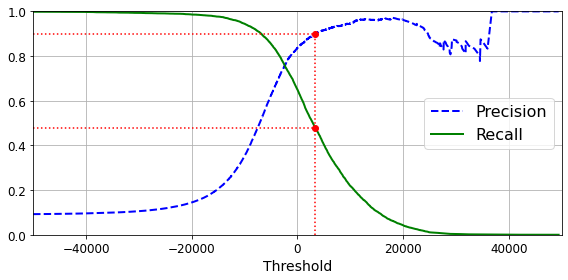

In [ ]:
# smallest threshold when precision is >= 90%
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.90], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")

save_fig("precision_recall_vs_threshold_plot")
plt.show()

The bumpy part on the right side of the precision is because precision fluctuates a little but generally goes up with the threshold increasing.

In [ ]:
# y_train_pred is actually the predictions of 0 and 1 
(y_train_pred == (y_scores > 0)).all()

True

Saving figure precision_vs_recall_plot


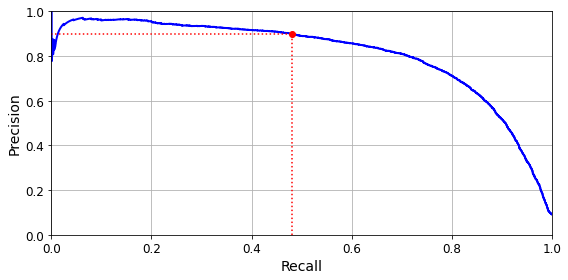

In [ ]:
def precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 4))
precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0, 0.9], "r:")
plt.plot([0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [ ]:
threshold_90_precision

3370.0194991439557

In [ ]:
# let's predict with this threshold now:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

##ROC Curve:
Plots ture positive (Recall) against the false positive (Negatives we classified as positive).</br>
remember: FPR = 1 - TNR

In [ ]:
# ROC
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


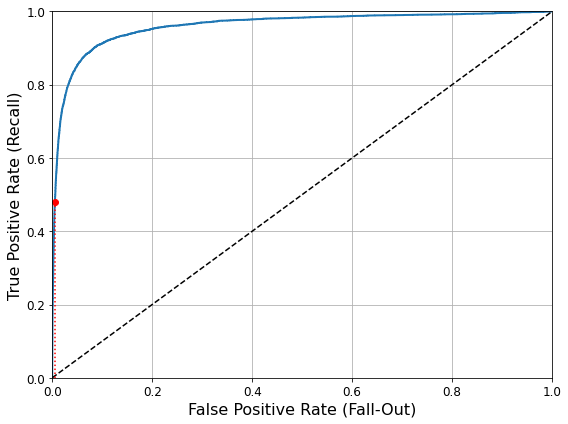

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  """Plot the ROC"""
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], "k--")
  plt.axis([0, 1, 0, 1])
  plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
  plt.ylabel("True Positive Rate (Recall)", fontsize=16)
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0, recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
plt.plot([fpr_90], [recall_90_precision], "ro")
save_fig("roc_curve_plot")  
plt.show()

You want the ROC to be closer to the top left which in turn means Area Under the Curve (AUC) to be closer to 1(higher). you can get the AUC by checking *roc_auc_score()*.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)  # 1 is perfect, 0.5 is random

0.9604938554008616

RandomForestClassifier does not have a decision_function() method instead it has ***predict_proba()*** which outputs the probabality for each class being the actual label. we can get these probabalities by setting the method parameter in cross_val_predict to "predict_proba". the outputs works perfectly with the roc_curve() function.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")


In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


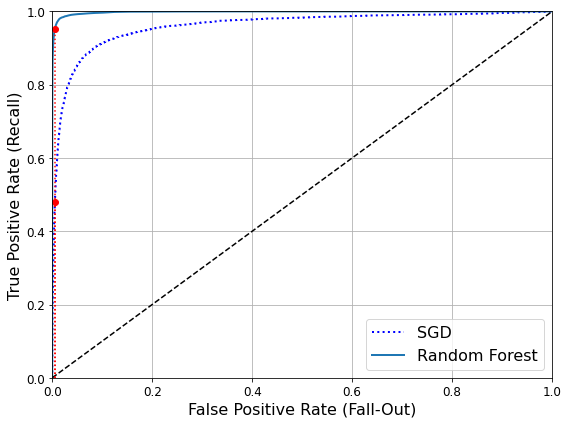

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest,"Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

## Multiclass Classification:
Now let's label each digit with it's own correct label( 1:1 , 2:2, ...).</br>
SGD, RandomForest, naive Bayes,... can handle multiple classes natively. some other algorithms like SMV and LR can only handle binary classifications to use them for more than 2 labels we should do ***OvR*** or ***OvO***(Page 100 has good descriptions for both). For algorithms that scale poorly with size OvO is the prefered method, for others OvR is the way to go. SciKit-Learn automatically realizes if you are performing a multilabel task and uses OvR or OvO for you!

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=42)  # check out what gamma is later on
svm_clf.fit(X_train[:1000], y[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_score = svm_clf.decision_function([some_digit])
some_digit_score

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [ ]:
np.argmax(some_digit_score)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[5]

5

You can ofcourse force the classifier to use your prefered method (be it OvR or OvO) like so:

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)  # number of estimators or models

10

In [ ]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

SGD's decision_function() in multilabel classification gives you 10 scores per instance. Makes sense.

In [ ]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

For some reason It just seems too good to believe, but scaling the images(inputs) helps your results. Very noticeably.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

##Error Analysis

In [ ]:
# Confusion Matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

Rows = Actual labels</br>
Columns = Predicted labels

Saving figure confusion_matrix_plot_colored


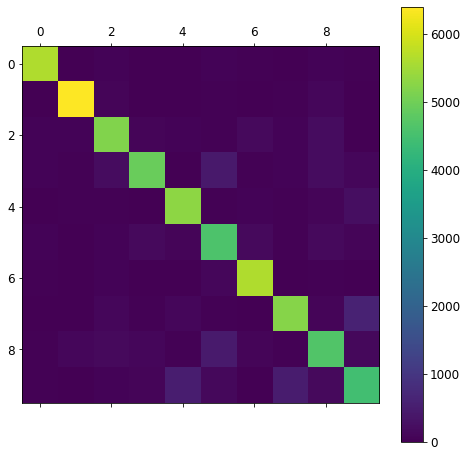

In [ ]:
# colorful using sklearn.metrics.plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# let's modify the function
def plot_confusion_matrix(matrix):
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(matrix)
  fig.colorbar(cax)

plot_confusion_matrix(conf_mx)
save_fig("confusion_matrix_plot_colored", tight_layout=False)

Saving figure confusion_matrix_plot_black_white


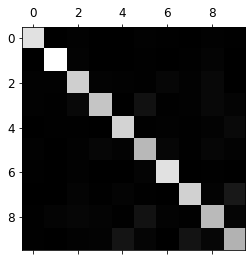

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot_black_white", tight_layout=False)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


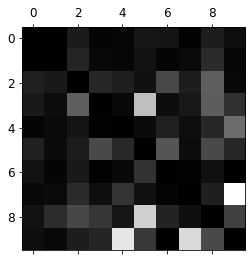

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Analysing individual errors: a bit more difficult and time consuming. But it can yield great insight.

Saving figure error_analysis_digits_plot


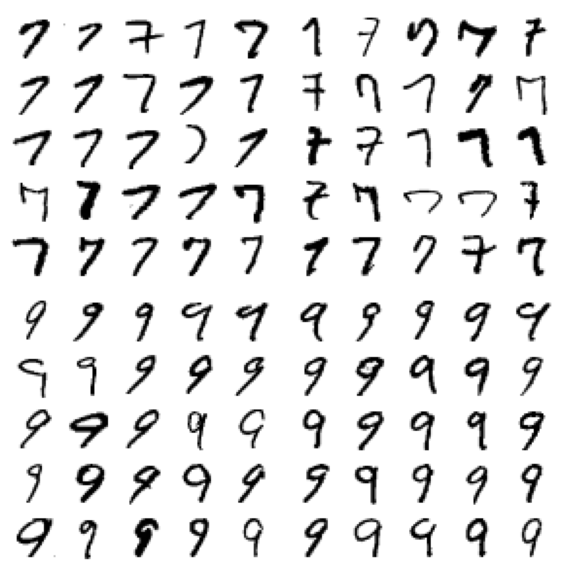

In [ ]:
cl_a, cl_b = 7, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()



Obviousely the 9s and 7s are sometimes written poorly and It's even hard for us to detect the digit correctly but most of the time it's a peace of cake! so Maybe we can make sure that the images are not too tilted and that they are centered for better results.

##Multilabel Classification:
Sometimes you want more than one label per instance. Let's create a model that tells us if a number is small (<=5) and if it's even (%2==0). two labels per instance:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_small = (y_train <= 5)
y_train_even = (y_train % 2 == 0)
y_multilabel = np.c_[y_train_small, y_train_even]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.predict([some_digit])

array([[ True, False]])

The next cell takes such a long time that I'm not gonna run it for now, but It works :)

In [ ]:
# y_train_knn_preds = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
# # just use average="weighted" so that labels have weights equal to their support
# f1_score(y_multilabel, y_train_knn_preds, average="macro")

##Multioutput Classification:
We're in the "multiple non-binary instace" zone!

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_tests), 784))
X_test_mod = X_tests + noise

y_train_mod = X_train
y_test_mod = X_tests

Saving figure noisy_digit_example_plot


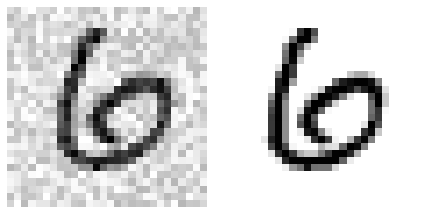

In [ ]:
some_index = 11
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")

Saving figure cleaned_digit_example_plot


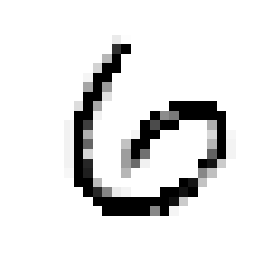

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
prediction = knn_clf.predict([X_test_mod[some_index]])
plot_digit(prediction)
save_fig("cleaned_digit_example_plot")

Exercise 1) Try to get over 97% accuracy with KNeighborsClassifier and a grid search on weights and n_neighbors:


note: this takes so long that i have given up but i wrote the code anyway and it should work.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 10]}
]

knn_tuned_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_tuned_clf, param_grid, cv=3,
                           scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
print("Highest socre: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

In [ ]:
y_knn_tuned_pred = knn_tuned_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_knn_tuned_pred)  # Over 97 (hopefully)

***Data Augmentation (training set expansion)***
Exercise 2) Write a function that shifts an image in any direction by one pixel and then make 4 copies of each image shifted in the data set.measure your model again on the new expanded data set.

In [ ]:
# Here's the function that basically does everything

from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, v, h):
  """
  Take in an array for image convert it into 28x28 and shift it by v and h and
  convert it back to a 1D array and return
  """

  image = image.reshape((28, 28))
  # the default for mode is constant itself. It fills the empty edges with cval
  shifted_image = shift(image, [v, h], cval=0, mode="constant")
  return shifted_image.reshape([-1])

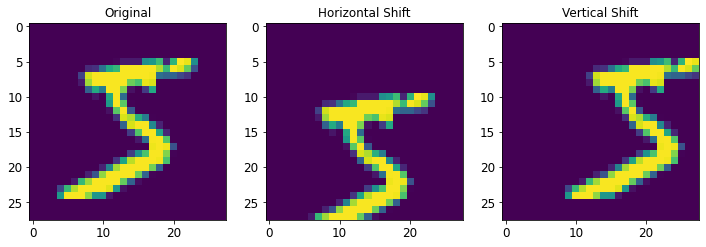

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title("Original")
plt.imshow(X_train[0].reshape(28, 28))
plt.subplot(132)
plt.title("Horizontal Shift")
plt.imshow(shift_image(X_train[0], 5, 0).reshape(28, 28))
plt.subplot(133)
plt.title("Vertical Shift")
plt.imshow(shift_image(X_train[0], 0, 5).reshape(28, 28))

In [ ]:
# Create the new extended dataset

# We do it like so because a=b in np arrays make pointers
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for h, v in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
  for image, label in zip(X_train, y_train):
    X_train_augmented.append(shift_image(image, h, v))
    y_train_augmented.append(label)

# We want the sets as a numpy array not a regular array:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
# Now we just need to shuffle it and we are ready to go
shuffle_indices = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_indices]
y_train_augmented = y_train_augmented[shuffle_indices]

From here on you just need to train a model on this data again. with this new augmented data set you give your model more chances to learn so you should be doing better. But since training these models takes so long we skipped retraining a model.

Exercise 3) **Titanic data set**:

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The test data does not contain the labels (Survived column).</br>
Here's a list of columns' meanings (for those that need it):


*   pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
*   sibsp 	# of siblings / spouses aboard the Titanic
*   parch 	# of parents / children aboard the Titanic
*   ticket 	Ticket number
*   fare 	Passenger fare 	
*   cabin 	Cabin number 	
*   embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton



In [ ]:
# Let's look at the numeral stuff:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


mean of survived is .38 which means almost 40% positive and 60% negative which is apperantly good enough for using accuracy as our measurement.

In [ ]:
#check that "Survived" is only 0s and 1s
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

string_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

Remember: By default any column that is not worked specified in ColumnTransformer is dropped so don't bother selecting columns.

In [ ]:
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer([
    ("string_pipe", string_pipeline, ["Pclass", "Sex", "Embarked"]),
    ("num_imputer", SimpleImputer(strategy="median"), ["Age", "SibSp", "Parch", "Fare"])
])

In [ ]:
X_train = preprocess_pipeline.fit_transform(train_data.drop("Survived", axis=1))
# Remember OneHotEncoder creates new columns
X_train

array([[ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.75  ]])

In [ ]:
y_train = train_data["Survived"]

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")  
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

Let's use cross validation to get a measure of our model's accuracy

In [ ]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

71% for the SVMM model. Let's try a Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8092883895131087

81 is much better now let's try and plot it instead of just looking at the mean. We are using boxplot with Quantiles and all(the boxplot() function disregards the outliers automatically):


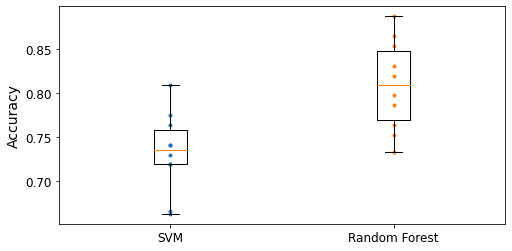

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

There are certain optimizations we can do to get better results. For instance we can convert some numerical attributes into categorical. Let's do this for Age and see how it works out:


In [ ]:
train_data["AgeBracket"] = train_data["Age"] //15 * 15
# Let's see what we've created
train_data[["AgeBracket", "Survived"]].groupby(["AgeBracket"]).mean()

,Survived
AgeBracket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


We can also combine some numerical attributes. Let's combine Parch and SibSp into one attribute or column:

In [ ]:
train_data["RelativesOnboard"] = train_data["Parch"] + train_data["SibSp"]
# Let's see it
train_data[["RelativesOnboard", "Survived"]].groupby(["RelativesOnboard"]).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


People without relatives survived with a 30% rate. Always travel with a relative.</br>Let's do RandomForest once more with this data:

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  AgeBracket        714 non-null    float64
 13  RelativesOnboard  891 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [ ]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8092883895131087

Exercise 4) Spam Classifier:

First let's download the data from the website, unzip it and get to know it a little better. As before, we write a function for it and specify the download path the folder structure which makes everything easier, cleaner and more robost.

In [2]:
import os
import urllib.request
import tarfile

DOWNLOAD_ROOT = "https://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20021010_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
  if not os.path.isdir(SPAM_PATH):
    os.makedirs(SPAM_PATH)
  for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
    file_path = os.path.join(spam_path, filename)
    # if file already exists, we don't download it again
    if not os.path.isfile(file_path):
      urllib.request.urlretrieve(url, file_path)
    # extract each file to it's own folder
    tar_bz2_file = tarfile.open(file_path)
    tar_bz2_file.extractall(spam_path)
    tar_bz2_file.close()

In [3]:
fetch_spam_data()

In [4]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR))]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR))]

The first file is not actual data, it is some information. feel free to check it out. We'll throw it out now:


In [5]:
del spam_filenames[0]
del ham_filenames[0]

In [6]:
print("Ham length: ", len(ham_filenames))
print("Spam lenght: ", len(spam_filenames))

Ham length:  2500
Spam lenght:  500


Emails includes more than just email's text (email format contains headers, encoders, etc.). So to handle the emails well we can use python's own email module which is quite handy and there's a great documentation on it:

In [16]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
  dir = "spam" if is_spam else "easy_ham"
  # open the files as binary (because it's not text)
  with open(os.path.join(spam_path, dir, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [17]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

The get_content() method loads the text within the email and strip() removes the \n or other characters from the end of the sentences.<br>Here's a ham:

In [19]:
print(ham_emails[1].get_content().strip())

Man Threatens Explosion In Moscow 

Thursday August 22, 2002 1:40 PM
MOSCOW (AP) - Security officers on Thursday seized an unidentified man who
said he was armed with explosives and threatened to blow up his truck in
front of Russia's Federal Security Services headquarters in Moscow, NTV
television reported.
The officers seized an automatic rifle the man was carrying, then the man
got out of the truck and was taken into custody, NTV said. No other details
were immediately available.
The man had demanded talks with high government officials, the Interfax and
ITAR-Tass news agencies said. Ekho Moskvy radio reported that he wanted to
talk with Russian President Vladimir Putin.
Police and security forces rushed to the Security Service building, within
blocks of the Kremlin, Red Square and the Bolshoi Ballet, and surrounded the
man, who claimed to have one and a half tons of explosives, the news
agencies said. Negotiations continued for about one and a half hours outside
the building, ITAR-

And here's a spam:

In [20]:
print(spam_emails[10].get_content().strip())

Cellular Phone Accessories All At Below Wholesale Prices!

http://202.101.163.34:81/sites/merchant/sales/

Hands Free Ear Buds 1.99! 
Phone Holsters 1.98! 
Booster Antennas Only $0.99
Phone Cases 1.98! 
Car Chargers 1.98! 
Face Plates As Low As 0.99! 
Lithium Ion Batteries As Low As 6.94! 

http://202.101.163.34:81/sites/merchant/sales/

Click Below For Accessories On All NOKIA, MOTOROLA LG, NEXTEL, 
SAMSUNG, QUALCOMM, ERICSSON, AUDIOVOX PHONES At Below 
WHOLESALE PRICES!

http://202.101.163.34:81/sites/merchant/sales/

***If You Need Assistance Please Call Us (732) 751-1457***


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
To be removed from future mailings please send your remove 
request to: removemenow68994@btamail.net.cn 
Thank You and have a super day :)


Some emails are just texts, in that case we are good to go. Some other emails contain different parts including images and attachments. Here we are going to define a function to find out how many parts is each email and to define what type of content is in each email. This function is a recursive one as each sub-email may contain more sub-emails.<br><br>
isinstance() checks if an object is of the given type then returns a bool.<br>
get_payload() gets the payload in parts called "sub_email"s.<br>
get_email_structure tells us the structure of an email

In [34]:
def get_email_structure(email):
  if email.is_multipart:
    # email contains different parts (sub-emails) or is not text
    payload = email.get_payload()
    if isinstance(payload, list):
      # if there are more than one sub-emails:
      return "multipart({})".format(", ".join([
        get_email_structure(sub_email) for sub_email in payload
      ]))
    else:
      # if there is only one sub-email:
      return email.get_content_type()
  else:
    # email has a single part (just text)
    return email

Now that we have a function that tells us how many parts and what type of parts each email has we can make another function that tells us how many emails have only text or how many have text and html or... using the python's Counter:

In [30]:
from collections import Counter

def structure_counter(emails):
  structures = Counter()
  for email in emails:
    structure = get_email_structure(email)
    structures[structure] += 1
  return structures

Now let's use Counter's method most_common to see the structures that appear the most in the emails:

In [35]:
structure_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [36]:
structure_counter(spam_emails).most_common()

[('text/plain', 221),
 ('text/html', 181),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 19),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

Looking at the structures of the emails we can draw out a few conclusions that might come in handy later:

*   hams are mostly text/plain but spams got a noticable amount of HTML in there
*   PGP signature appears a lot in hams but it is absent from spams

Let's examine the headers more closely and try and find useful information there. First let's see what information is there in a header:

In [39]:
for header, value in spam_emails[10].items():
  print("{} : {}".format(header, value))

Return-Path : <hurst@missouri.co.jp>
Delivered-To : zzzz@localhost.example.com
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.example.com (Postfix) with ESMTP id 2667B44156	for <zzzz@localhost>; Fri, 23 Aug 2002 06:02:51 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:02:51 +0100 (IST)
Received : from toole.uol.com.br (toole.uol.com.br [200.231.206.186])	by webnote.net (8.9.3/8.9.3) with ESMTP id WAA06855;	Thu, 22 Aug 2002 22:28:56 +0100
From : hurst@missouri.co.jp
Received : from activatormail.com ([200.158.104.164])	by toole.uol.com.br (8.9.1/8.9.1) with SMTP id SAA13079;	Thu, 22 Aug 2002 18:21:49 -0300 (BRT)
Message-ID : <000023b8700d$00003a16$00004696@missouri.co.jp>
To : hurst@missouri.co.jp
Subject : ^^^^^Cell Phone Belt Clips $1.95^^^^^^                           18070
Date : Thu, 22 Aug 2002 15:45:31 -0600
MIME-Version : 1.0
Content-Type : text/plain; 

We can use the Sender's address, date and other information available in the header. Subject seems to be the most prominent infor here and we will focus on this bit of information for now:

In [40]:
spam_emails[10]["Subject"]

'^^^^^Cell Phone Belt Clips $1.95^^^^^^                           18070'

Let's split the data into train and test set before we find out too much about it with numpy:

In [42]:
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Preprocessing:<br>We want to convert the HTML to plain text. The easier better way to do this is to use BeautifulSoup library. For some reason the author of the book did not want to add that library to this section. We are going to follow him in doing so and create a regex function to do it manually although it has some complications explained in a fun way [here](https://stackoverflow.com/a/1732454/38626).

In [43]:
import re
from html import unescape

def html2plaintext(html):
  # dropping the head tag
  text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
  # replacing the anchor tag with the word HYPERLINK
  text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
  # dropping all other html tags to leave us with only plain text
  text = re.sub('<.*?>', '', text, flags=re.M | re.S)
  # replacing multiple newlines with a single \n
  text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
  # return the text with unescaped characters (like &nbsp , ...)
  return unescape(text)

To test it we separate some emails from our train set with html in them and see how our functions treats them:

In [49]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email)=="text/html"]
print(html_spam_emails[50].get_content().strip()[:1000])                    

<HTML>
<head>
<META HTTP-EQUIV="Content-Type" CONTENT="text/html;charset=Windows-1252">
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<TITLE>Free Info!</TITLE>
<META http-equiv=Content-Type content="text/html; charset=windows-1252">
<META content="Microsoft FrontPage 4.0" name=GENERATOR><BASE href="http://62.232.161.231/freeinfo/">
<STYLE>
</STYLE>
</HEAD>
<BODY bgColor=#ffffff leftMargin=0 topMargin=0>
<TABLE borderColor=#ffa025 cellSpacing=0 cellPadding=0 width=680 align=center 
bgColor=#f08800 border=2>
  <TBODY>
  <TR>
    <TD>
      <TABLE borderColor=#000000 cellSpacing=0 cellPadding=0 width=660 
      align=center border=1>
        <TBODY>
        <TR>
          <TD vAlign=top noWrap borderColor=#ffa025 width=350 
          background="http://62.232.161.231/freeinfo/images/leftside.jpg">
            <P align=center><B><A 
            name=top><span style="letter-spacing: 5"><u><strong><em><font face="Times New Roman" size="7">FREE</font></em></strong></u></span>

In [50]:
print(html2plaintext(html_spam_emails[50].get_content().strip())[:1000])


             HYPERLINK FREE
            The
            Insider Stock Market Report
            $2400 Value
            Get
            the latest competitive intelligence, insider knowledge and
            deal-sourcing contacts to stay ahead & succeed in this
            supercharged market!
                  Free
                  3 month subscription
            Subscribed
            to by over 200 investment bankers, venture capitalists, fund
            managers, deal-makers and public company CEO & CFO�s
              world
                market overviews and updates
              "first
                seen" analyst reports
              investment
                alerts
              portfolio
                strategies for the 21st century
              annual
                offshore jurisdiction rankings report
                  Get
                  the information the professionals profit from $$$
                  Fill out the form for 
            FREE SUBSCRIPTION N

We can now create a more general function that returns plain text regardless of the email's content (sort of):

In [53]:
def email2text(email):
  html = None
  for part in email.walk():
    content_type = part.get_content_type()
    if not content_type in ("text/plain", "text/html"):
      continue
    try:
      content = part.get_content()
    except: # for weird encodings
      content = str(part.get_payload())
    if content_type == "text/plain":
      return content
    else:
      html = content
  if html:
    return html2plaintext(html)


In [57]:
print(email2text(html_spam_emails[42])[:1000])


      Fortunes are literally being made in this great new
        marketplace!
      Over $9 Billion in merchandise
        was sold on eBay in 2001 by people just like you - right from
        their homes!
      Now you too can learn the secrets of successful selling
        on eBay and make a staggering income from the comfort
        of your own home. If you are motivated, capable of having
        an open mind, and can follow simple directions, then  HYPERLINK visit
        us here. If server busy -  HYPERLINK alternate.
       We are strongly against sending unsolicited
        emails to those who do not wish to receive our special mailings. You have
        opted in to one or more of our affiliate sites requesting to be notified
        of any special offers we may run from time to time. We also have attained
        the services of an independent 3rd party to overlook list management and
        removal services. This is NOT unsolicited email. If you do not wish to
        rece

For further pre-processing we are going to use NLTK library for stemming:


In [58]:
%pip install nltk

In [59]:
import nltk

print("Stemming example:")
stemmer = nltk.PorterStemmer()
for word in ("assert", "asserting", "assersion", "asserted"):
  print(word + " ===> " + stemmer.stem(word))

Stemming example:
assert ===> assert
asserting ===> assert
assersion ===> assers
asserted ===> assert


We do also need to replace urls with "URL" which can be performed with regex or yet easier with the urlextract library.

In [60]:
%pip install urlextract

In [66]:
import urlextract

url_extractor = urlextract.URLExtract()
# it will output the link if it finds it
print(url_extractor.find_urls("This is string that contains a url somewhere in"
  "it https://app.thestorygraph.com/books/d951bf9b-ec6c-4763-883b-fc63fe81fc9b"))

['https://app.thestorygraph.com/books/d951bf9b-ec6c-4763-883b-fc63fe81fc9b']


Let's pull it all together to make a transformer: